In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("best-selling-manga.csv", encoding="latin-1")

In [3]:
df.head()

,ï»¿Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)
0,One Piece,Eiichiro Oda,Shueisha,ShÅnen,104,1997âpresent,516.6,4.97
1,Golgo 13,"Takao Saito, Saito Production",Shogakukan,Seinen,207,1968âpresent,300.0,1.45
2,Case Closed / Detective Conan,Gosho Aoyama,Shogakukan,ShÅnen,102,1994âpresent,270.0,2.65
3,Dragon Ball,Akira Toriyama,Shueisha,ShÅnen,42,1984â1995,260.0,6.19
4,Doraemon,Fujiko F. Fujio,Shogakukan,Children,45,1969â1996,250.0,4.71


In [4]:
df.isnull().any()

ï»¿Manga series                           False
Author(s)                                 False
Publisher                                 False
Demographic                               False
No. of collected volumes                  False
Serialized                                False
Approximate sales in million(s)           False
Average sales per volume in million(s)    False
dtype: bool

In [15]:
genre_counts = df['Demographic'].value_counts()
genre_counts

Shounen     108
Seinen       50
Shoujo       22
Children      4
Josei         2
â           1
Name: Demographic, dtype: int64

In [18]:
weird_genre = df[df['Demographic']=='â']
weird_genre

,ï»¿Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)


In [17]:
df['Demographic'] = df['Demographic'].replace('ShÅjo/Josei', 'Shoujo')

In [77]:
df['Demographic'] = df['Demographic'].str.split('/')
df = df.explode('Demographic')

In [19]:
publisher_count = df['Publisher'].value_counts()
publisher_count

Shueisha                                         65
Kodansha                                         50
Shogakukan                                       32
Akita Shoten                                     11
Hakusensha                                        7
Nihon Bungeisha                                   3
Square Enix                                       2
Kadokawa Shoten                                   2
ShÅnen GahÅsha                                  2
Futabasha                                         2
Shueisha/Shogakukan/Leed                          1
Shueisha/Kodansha                                 1
Enix                                              1
Square Enix, Ichijinsha                           1
Ushio Shuppan                                     1
Enix (2001â2003), Square Enix (2003â2010)     1
Kobunsha                                          1
Ushio Shuppansha                                  1
Jitsugyo no Nihon Sha                             1
Shinchosha, 

In [107]:
weird_publisher = df[df['Publisher']=='Enix (2001â2003), Square Enix (2003â2010)']
weird_publisher

,ï»¿Manga series,Author(s),Publisher,Demographic,No. of collected volumes,Serialized,Approximate sales in million(s),Average sales per volume in million(s)


In [106]:
df['Publisher'] = df['Publisher'].str.split(', ')
df = df.explode('Publisher')

In [110]:
replacer = {'Enix (2001â2003)': 'Enix', 'Square Enix (2003â2010)': 'Square Enix'}
df['Publisher'] = df['Publisher'].replace(replacer)

In [141]:
df.rename(columns={'ï»¿Manga series': 'Manga Series'}, inplace=True)

In [150]:
df.describe()

,No. of collected volumes,Approximate sales in million(s),Average sales per volume in million(s)
count,193.000000,193.000000,193.000000
mean,45.917098,50.263886,1.367202
std,34.217189,56.471075,1.232318
min,5.000000,20.000000,0.190000
25%,24.000000,24.000000,0.640000
50%,34.000000,30.000000,1.030000
75%,55.000000,50.000000,1.640000
max,207.000000,516.600000,10.000000


In [163]:
#Average sales for each genres
shounen_average_sales = df[df['Demographic']=='Shounen']['Average sales per volume in million(s)'].mean()
seinen_average_sales = df[df['Demographic']=='Seinen']['Average sales per volume in million(s)'].mean()
shoujo_average_sales = df[df['Demographic']=='Shoujo']['Average sales per volume in million(s)'].mean()
children_average_sales = df[df['Demographic']=='Children']['Average sales per volume in million(s)'].mean()
josei_average_sales = df[df['Demographic']=='Josei']['Average sales per volume in million(s)'].mean()

print("Average sales shounen = ", shounen_average_sales, "\n")
print("Average sales seinen = ", seinen_average_sales, "\n")
print("Average sales shoujo = ", shoujo_average_sales, "\n")
print("Average sales josei = ", josei_average_sales, "\n")
print("Average sales children = ", children_average_sales, "\n")

Average sales shounen =  1.58927927927928 

Average sales seinen =  0.9360377358490568 

Average sales shoujo =  1.249090909090909 

Average sales josei =  1.125 

Average sales children =  1.5525 



In [166]:
shounen_sales = df[df['Demographic']=='Shounen']['Approximate sales in million(s)'].sum()
seinen_sales = df[df['Demographic']=='Seinen']['Approximate sales in million(s)'].sum()
shoujo_sales = df[df['Demographic']=='Shoujo']['Approximate sales in million(s)'].sum()
josei_sales = df[df['Demographic']=='Josei']['Approximate sales in million(s)'].sum()
children_sales = df[df['Demographic']=='Children']['Approximate sales in million(s)'].sum()

print("Shounen Sales", shounen_sales, "\n")
print("Seinen Sales", seinen_sales, "\n")
print("Shoujo Sales", shoujo_sales, "\n")
print("Josei Sales", josei_sales, "\n")
print("Children Sales", children_sales, "\n")

Shounen Sales 6489.3 

Seinen Sales 2056.33 

Shoujo Sales 681.1 

Josei Sales 67.0 

Children Sales 321.2 



In [167]:
genres = {
    'Genre': ['Shounen', 'Seinen', 'Shoujo', 'Josei', 'Children'],
    'Sales': [6489.3, 2056.33, 681.1, 67.0, 321.2]
}

genre_df = pd.DataFrame(genres)
genre_df

,Genre,Sales
0,Shounen,6489.30
1,Seinen,2056.33
2,Shoujo,681.10
3,Josei,67.00
4,Children,321.20


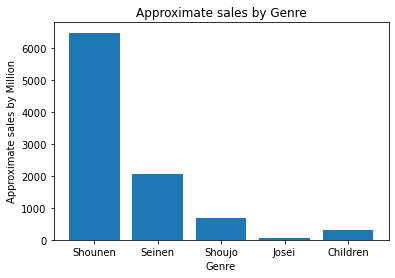

In [168]:
plt.bar(genre_df['Genre'], genre_df['Sales'])
plt.xlabel('Genre')
plt.ylabel('Approximate sales by Million')
plt.title('Approximate sales by Genre')
plt.show()